## import Relavent modules : 

In [1]:
import pandas as pd  # Data Manipulation
import seaborn as sn
import matplotlib.pyplot as plt  # Data visualization
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("fake_or_real_news.csv")
df.head()   

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df1 = df.drop(["Unnamed: 0","title"],axis = "columns")  ## axis  =1 -> to drop element by columns

In [4]:
df1.tail()

,text,label
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 2 columns):
text     6335 non-null object
label    6335 non-null object
dtypes: object(2)
memory usage: 99.1+ KB


In [6]:
df1.isnull().sum()

text     0
label    0
dtype: int64

In [27]:
df1.text.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
df1.head()

,text,label
0,Daniel Greenfield a Shillman Journalism Fello...,FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U S Secretary of State John F Kerry said Mon...,REAL
3,Kaydee King KaydeeKing November T...,FAKE
4,It s primary day in New York and front runners...,REAL


In [8]:
#df1.loc[df1.Label == "FAKE","Label"]=0
#df1.loc[df1.Label == "REAL","Label"]=1
#df1

In [28]:
#df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 2 columns):
text     6335 non-null object
label    6335 non-null object
dtypes: object(2)
memory usage: 99.1+ KB


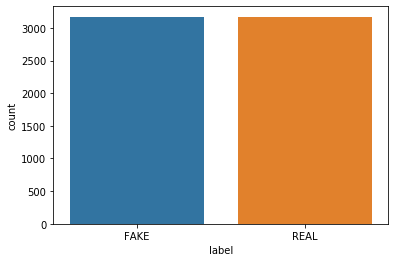

In [10]:
import seaborn as sn

sn.countplot(df1.label)    # check wheather data is balance or not..


In [11]:
df1.head()

,text,label
0,Daniel Greenfield a Shillman Journalism Fello...,FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U S Secretary of State John F Kerry said Mon...,REAL
3,Kaydee King KaydeeKing November T...,FAKE
4,It s primary day in New York and front runners...,REAL


In [12]:
x = df1.text  ## independent variable 
y = df1.label   # Dependent variable


In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test  =train_test_split(x,y,test_size = 0.2)

In [14]:
x_train.head()
x_train.shape

(5068,)

In [15]:
cv = CountVectorizer(stop_words="english",lowercase=True) 


#cv = TfidfVectorizer(stop_words="english",lowercase=True)

In [16]:
x_traincv = cv.fit_transform(x_train)

cv.get_feature_names()

['aa',
 'aaa',
 'aaahhh',
 'aab',
 'aachen',
 'aadmi',
 'aae',
 'aaeeb',
 'aaib',
 'aaingr',
 'aalia',
 'aaliya',
 'aaluijqn',
 'aam',
 'aamaq',
 'aaojejptcy',
 'aap',
 'aaron',
 'aaronapollocamp',
 'aaronson',
 'aarp',
 'aart',
 'aaso',
 'aau',
 'aauw',
 'aaza',
 'ab',
 'aba',
 'abaaoud',
 'ababa',
 'aback',
 'abad',
 'abadi',
 'abaldo',
 'aban',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandonnig',
 'abandons',
 'abate',
 'abated',
 'abatement',
 'abating',
 'abatzoglou',
 'abayas',
 'abbakumova',
 'abbar',
 'abbas',
 'abbe',
 'abbey',
 'abbn',
 'abbot',
 'abbott',
 'abbottabad',
 'abboud',
 'abbreviated',
 'abbreviation',
 'abbreviations',
 'abby',
 'abc',
 'abcnews',
 'abcpolitics',
 'abd',
 'abdallah',
 'abdel',
 'abdelhamid',
 'abdeslam',
 'abdicate',
 'abdicated',
 'abdication',
 'abdirashid',
 'abdiwahab',
 'abdollah',
 'abdollahi',
 'abdomen',
 'abdominal',
 'abdrabbuh',
 'abduct',
 'abducted',
 'abductee',
 'abductees',
 'abduction',
 'abductions',
 'abducto

In [17]:
a = x_traincv.toarray()
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
cv.inverse_transform(a[0])

[array(['according', 'ago', 'angeles', 'appears', 'april', 'bearded',
        'board', 'campaign', 'carolina', 'charleston', 'cheering',
        'clutches', 'clutching', 'college', 'crowd', 'day', 'days',
        'disabled', 'extends', 'february', 'flight', 'florida', 'guy',
        'halfway', 'hand', 'handrail', 'helps', 'hillary', 'holding',
        'hurries', 'just', 'lake', 'later', 'leaves', 'left', 'like',
        'live', 'los', 'make', 'man', 'mark', 'months', 'moves',
        'mumbling', 'news', 'north', 'october', 'old', 'plane', 'platform',
        'rally', 'right', 'salem', 'satellite', 'sc', 'sept', 'southwest',
        'step', 'steps', 'stumbles', 'sunglasses', 'thursday', 'tightly',
        'tilting', 'turned', 'umbrella', 'unsteady', 'video', 'walking',
        'walks', 'winston', 'wobbly', 'woman', 'worth'], dtype='<U38')]

In [19]:
x_train.iloc[0]

'February          in Charleston  SC   And this  April          at Southwest College  Los Angeles   And this  less than two months ago on Sept             On Thursday  October           Hillary was in Lake Worth  Florida for a rally   She walks up to the cheering crowd  as a bearded guy in sunglasses hurries to her side   He extends his left hand to Hillary  she clutches it tightly  The man then helps her to make a step up onto the platform   Just one step   Here s the video   Later that day  Hillary leaves Florida for another rally in Winston Salem  North Carolina   Walking up a flight of    steps to board her campaign plane  while holding an umbrella in her left hand and clutching the handrail with her right  and  mumbling to herself   according to Live Satellite News    Hillary appears to be wobbly and unsteady  Halfway up the steps  she stumbles  tilting her umbrella down       mark    Hillary turned    two days ago on October     but moves like a disabled old woman '

In [20]:
x_testcv = cv.transform(x_test)

In [21]:
x_testcv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:



mnb = MultinomialNB()
mnb.fit(x_traincv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
mnb.predict(x_testcv)

array(['REAL', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'FAKE'], dtype='<U4')

In [24]:
## check

s = ["Prime Minister Narendra Modi on Tuesday announced that the nationwide lockdown  will continue till May 3. In his televised address, the third in less than a month, PM Modi said more stringent steps will be taken for the next one week to check spread of COVID-19. States where the possibility of Coronavirus spread will be less, maybe granted some relief after April 20. New guidelines for lockdown will be released tomorrow. According to the latest data released by the Union Ministry of Health, the total COVID-19 cases in India has crossed the 10,000-mark with current numbers at 10,363. In India, there are 8,988 active cases, 1035 coronavirus positive patients have been cured and one has been migrated. So far, 339 COVID-19 positive patients have died in India due to the deadly virus, as per the information shared by the Central government."]

v = cv.transform(s)
v.toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
mnb.predict(v)

array(['FAKE'], dtype='<U4')